In [7]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
from scipy.stats import entropy
from math import log, e ,log10, sqrt 

In [8]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
#     print(np.array(im).shape)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
#     for color image pix[0,0] is a tuple 
#     for gray its a INT
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
#     print(color)
#     print(image_size[0])
    return image_matrix,image_size[0],color

In [9]:
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
#     print(G)
    x=0.5
    y=x*255
    imageMatrix,dimension, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ (( key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ (( key_list[3])%N) 
            if color:
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ (( key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ (( key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ (( key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimension, dimension))
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else: 
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
      
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")

In [10]:

def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    x=0.5
    y=x*255
    imageMatrix, dimension, color = getImageMatrix(imageName)

    DecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((key_list[3])%N) 
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1  
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        DecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else: 
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = DecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")

# Gray Image

In [13]:
image="lena"
ext=".bmp"

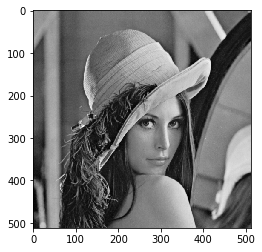

In [14]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

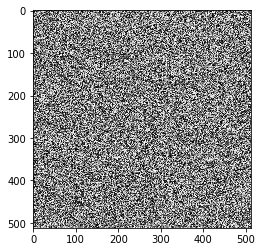

In [15]:
# enter some 13 char or digit long key

LogisticEncryption("lena.bmp", "sagarrajput12")
im = Image.open("lena_LogisticEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

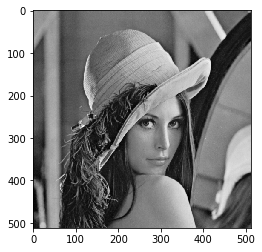

In [16]:
LogisticDecryption("lena_LogisticEnc.png","sagarrajput12")
im = Image.open("lena_LogisticDec.png", 'r')
imshow(np.asarray(im),cmap='gray')

# Color

In [17]:
image = "lena"
ext = ".png"
key = "abcdefghijklm"

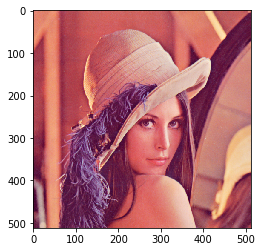

In [18]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')


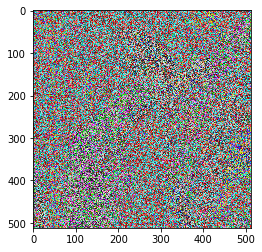

In [19]:
LogisticEncryption(image + ext, key)
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

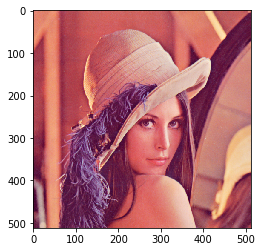

In [20]:
LogisticDecryption(image + "_LogisticEnc.png", key)
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))

# Histogram Analysis

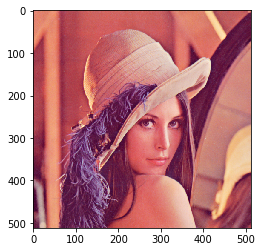

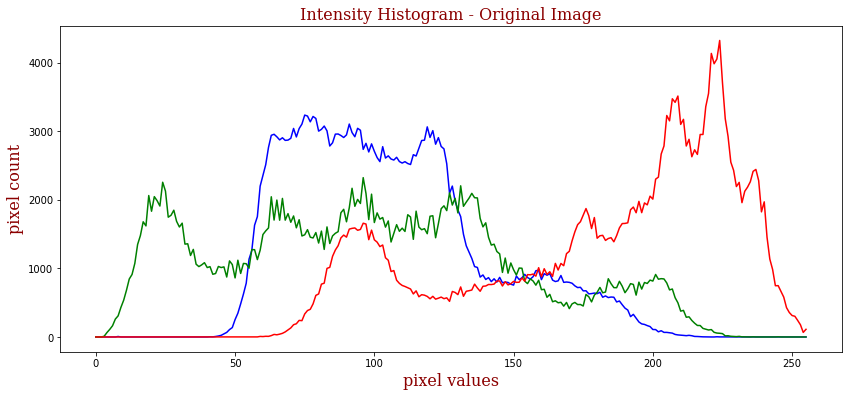

In [31]:
image = "lena"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
# plt.savefig('histo_original.png')
plt.title('Intensity Histogram - Original Image', fontdict=font)
plt.xlabel('pixel values', fontdict=font)
plt.ylabel('pixel count', fontdict=font) 
plt.show()

# Encrypted Image

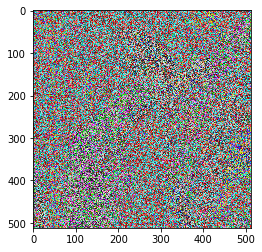

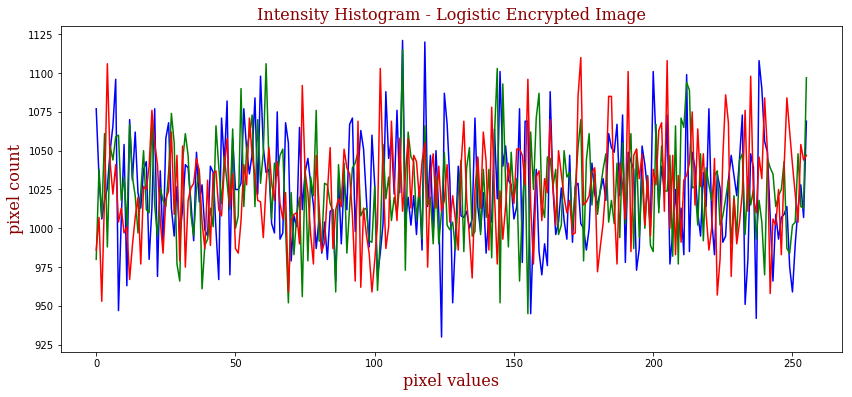

In [30]:
image = "lena_LogisticEnc"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
# plt.savefig('histo_encrypted.png')
plt.title('Intensity Histogram - Logistic Encrypted Image', fontdict=font)
plt.xlabel('pixel values', fontdict=font)
plt.ylabel('pixel count', fontdict=font) 
plt.show()


In [23]:
def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)


img = Image.open('lena.png')

img_array=np.array(img)

imgE = Image.open('lena_LogisticEnc.png')

img_arrayE=np.array(imgE)
print('original = ',entropy1(img_array,2))
print('Encrypted = ',entropy1(img_arrayE,2))

original =  7.750197479743165
Encrypted =  7.999732985976435


In [24]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    print("mse = ",mse)
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 256
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
def main(): 
     original = cv2.imread("lena.png") 
     compressed = cv2.imread("lena_LogisticEnc.png", 1) 
     value = PSNR(original, compressed) 
     print(f"PSNR value is {value} dB") 
       
if __name__ == "__main__": 
    main() 

mse =  105.49950408935547
PSNR value is 27.93229512428496 dB
